In [1]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py

In [2]:
import lib

In [3]:
lib.plotting.setup()

In [4]:
ALPHA = {
    -1: (0.0, 6.0),
    0: (0.0, 0.3),
    1: (0.3, 0.6),
    2: (0.6, 0.9),
    3: (0.9, 1.2),
    4: (1.2, 1.5),
    5: (1.5, 1.8),
    6: (1.8, 2.1),
    7: (2.1, 2.4),
    8: (2.4, 2.7),
    9: (2.7, 6.0),
}
ALPHA_BINS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

tomo_colors = {
    alpha: mpl.cm.cubehelix(alpha / max(ALPHA_BINS) / 2 + 1 / 4)
    for alpha in ALPHA_BINS
}

In [5]:
input_file_constant = "./N_gamma_alpha_v3_statistical_true-tomo-constant.hdf5"

Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.
Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.


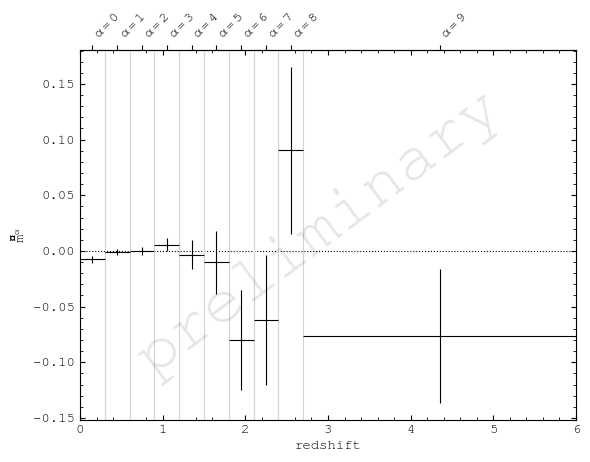

In [6]:
fig, axs = plt.subplots(1, 1)

axs.axhline(0, ls=":")

_zc = []
with h5py.File(input_file_constant, "r") as N_gamma_alpha:
    for tomographic_bin in ALPHA_BINS:
        
        # tomo_results = results[np.nonzero(results["tomographic_bin"] == tomographic_bin)]
        # zlow = tomo_results["zlow"]
        # zhigh = tomo_results["zhigh"]
        # zcenter = 0.5 * (zlow + zhigh)
        # zdiff = zhigh - zlow
        alpha_sel = N_gamma_alpha["shear/mean_params"][:, 0] == tomographic_bin
        tomo_sel = N_gamma_alpha["shear/mean_params"][:, 1] == tomographic_bin
        sel = alpha_sel & tomo_sel
        alphas = N_gamma_alpha["shear/mean_params"][sel, 0]
        Ngammaalpha_mean = N_gamma_alpha["shear/mean"][sel]
        Ngammaalpha_var = np.diag(N_gamma_alpha["shear/cov"])[sel]
        zl = np.array([ALPHA[alpha][0] for alpha in alphas])
        zh = np.array([ALPHA[alpha][1] for alpha in alphas])
        # zl = Ngammaalpha["zlow"]
        # zh = Ngammaalpha["zhigh"]
        zc = 0.5 * (zl + zh)
        zd = zh - zl
        _zc.append(zc)

        for i, (_zl, _zh) in enumerate(zip(zl, zh)):
            # axs.axvline(_zh, ls=":")
            # axs.axvline(_zh, alpha=0.1)
            axs.axvline(_zh, c="lightgray")
            # axs.text(
            #     zh,
            #     0,
            #     f"$\\alpha = {i}$",
            #     ha="right",
            #     va="center",
            # )
    
        # N = tomo_results["dg_obs_mean"] / tomo_results["dg_true_mean"]
        # # N_error = 3 * tomo_results["dg_obs_std"] / tomo_results["dg_true_std"]
        # N_error = 3 * np.abs(N) * np.hypot(tomo_results["dg_obs_std"] / tomo_results["dg_obs_mean"], tomo_results["dg_true_std"] / tomo_results["dg_true_mean"])
    
        axs.errorbar(
            zc,
            Ngammaalpha_mean - 1,
            [
                Ngammaalpha_var**(1/2),
                Ngammaalpha_var**(1/2),
            ],
            [
                zc - zl,
                zh - zc,
            ],
            fmt="none",
            c="k",
        )
        # axs.plot(
        #     zc,
        #     Ngammaalpha_mean - delta_ij,
        #     # fmt="none",
        #     c=tomo_colors[tomographic_bin],
        #     label=f"$\\beta = {tomographic_bin}$",
        #     zorder=-tomographic_bin,
        # )

zc = np.concatenate(_zc)

secax = axs.secondary_xaxis("top")
secax.set_ticks(
    zc,
    labels=[f"$\\alpha = {i}$" for i, z in enumerate(zc)],
    minor=False,
    ha="left",
    rotation=45,
)
secax.set_ticks(
    [],
    minor=True,
)
secax.tick_params(
    direction="out",
)


axs.set_xlabel("redshift")
axs.set_ylabel("$\\hat{m}^{\\alpha}$")
axs.set_xlim(0, 6)

# axs.set_ylim(-0.1, 0.1)

lib.plotting.watermark(fig)


plt.show()

In [24]:
# input_file = "./N_gamma_alpha_v3_statistical_true-tomo.hdf5"
input_file = "../../measurements/N_gamma_alpha_v3_statistical_true-tomo_dc=0.1.hdf5"

Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.
Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.
Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.


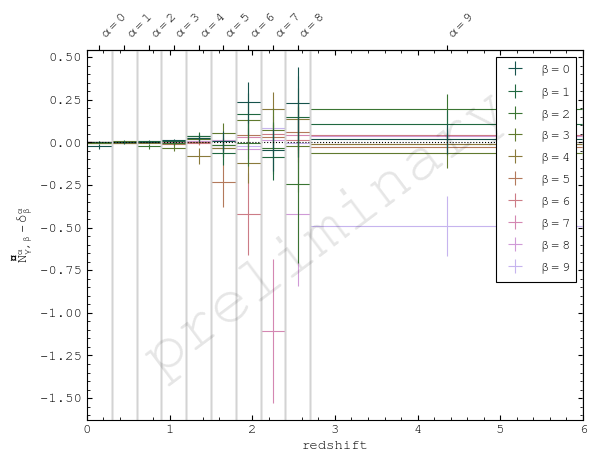

In [25]:
fig, axs = plt.subplots(1, 1)

axs.axhline(0, ls=":")

with h5py.File(input_file, "r") as N_gamma_alpha:
    for tomographic_bin in ALPHA_BINS:
        
        # tomo_results = results[np.nonzero(results["tomographic_bin"] == tomographic_bin)]
        # zlow = tomo_results["zlow"]
        # zhigh = tomo_results["zhigh"]
        # zcenter = 0.5 * (zlow + zhigh)
        # zdiff = zhigh - zlow
        alpha_sel = N_gamma_alpha["shear/mean_params"][:, 0] >= 0
        tomo_sel = N_gamma_alpha["shear/mean_params"][:, 1] == tomographic_bin
        sel = alpha_sel & tomo_sel
        alphas = N_gamma_alpha["shear/mean_params"][sel, 0]
        Ngammaalpha_mean = N_gamma_alpha["shear/mean"][sel]
        Ngammaalpha_var = np.diag(N_gamma_alpha["shear/cov"])[sel]
        zl = np.array([ALPHA[alpha][0] for alpha in alphas])
        zh = np.array([ALPHA[alpha][1] for alpha in alphas])
        # zl = Ngammaalpha["zlow"]
        # zh = Ngammaalpha["zhigh"]
        zc = 0.5 * (zl + zh)
        zd = zh - zl

        delta_ij = np.where(
            alphas == tomographic_bin,
            np.ones_like(alphas),
            np.zeros_like(alphas),
        )

        for i, (_zl, _zh) in enumerate(zip(zl, zh)):
            # axs.axvline(_zh, ls=":")
            # axs.axvline(_zh, alpha=0.1)
            axs.axvline(_zh, c="lightgray")
            # axs.text(
            #     zh,
            #     0,
            #     f"$\\alpha = {i}$",
            #     ha="right",
            #     va="center",
            # )
    
        # N = tomo_results["dg_obs_mean"] / tomo_results["dg_true_mean"]
        # # N_error = 3 * tomo_results["dg_obs_std"] / tomo_results["dg_true_std"]
        # N_error = 3 * np.abs(N) * np.hypot(tomo_results["dg_obs_std"] / tomo_results["dg_obs_mean"], tomo_results["dg_true_std"] / tomo_results["dg_true_mean"])
    
        axs.errorbar(
            zc,
            Ngammaalpha_mean - delta_ij,
            [
                Ngammaalpha_var**(1/2),
                Ngammaalpha_var**(1/2),
            ],
            [
                zc - zl,
                zh - zc,
            ],
            fmt="none",
            c=tomo_colors[tomographic_bin],
            label=f"$\\beta = {tomographic_bin}$",
            zorder=-tomographic_bin,
        )
        # axs.plot(
        #     zc,
        #     Ngammaalpha_mean - delta_ij,
        #     # fmt="none",
        #     c=tomo_colors[tomographic_bin],
        #     label=f"$\\beta = {tomographic_bin}$",
        #     zorder=-tomographic_bin,
        # )

secax = axs.secondary_xaxis("top")
secax.set_ticks(
    zc,
    labels=[f"$\\alpha = {i}$" for i, z in enumerate(zc)],
    minor=False,
    ha="left",
    rotation=45,
)
secax.set_ticks(
    [],
    minor=True,
)
secax.tick_params(
    direction="out",
)


axs.set_xlabel("redshift")
axs.set_ylabel("$\\hat{N}_{\\gamma, \\beta}^{\\alpha} - \\delta_{\\beta}^{\\alpha}$")
axs.set_xlim(0, 6)
axs.legend(loc="upper right")
# axs.set_ylim(-0.1, 0.1)

lib.plotting.watermark(fig)

fig.savefig("N_gamma_alpha_beta.pdf")

plt.show()

Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.
Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.
Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.


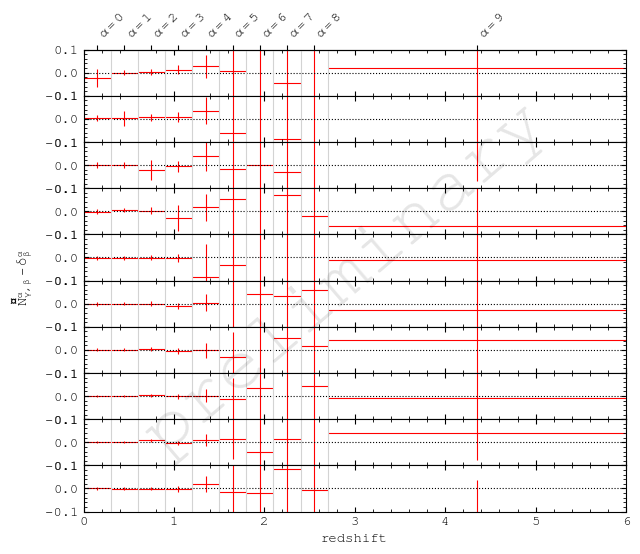

In [26]:
fig, axs = plt.subplots(10, 1, figsize=(7, 6), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)

with h5py.File(input_file, "r") as N_gamma_alpha:
    for tomographic_bin in ALPHA_BINS:
        
        axs[tomographic_bin].axhline(0, ls=":")
        
        # tomo_results = results[np.nonzero(results["tomographic_bin"] == tomographic_bin)]
        # zlow = tomo_results["zlow"]
        # zhigh = tomo_results["zhigh"]
        # zcenter = 0.5 * (zlow + zhigh)
        # zdiff = zhigh - zlow
        alpha_sel = N_gamma_alpha["shear/mean_params"][:, 0] >= 0
        tomo_sel = N_gamma_alpha["shear/mean_params"][:, 1] == tomographic_bin
        sel = alpha_sel & tomo_sel
        alphas = N_gamma_alpha["shear/mean_params"][sel, 0]
        Ngammaalpha_mean = N_gamma_alpha["shear/mean"][sel]
        Ngammaalpha_var = np.diag(N_gamma_alpha["shear/cov"])[sel]
        zl = np.array([ALPHA[alpha][0] for alpha in alphas])
        zh = np.array([ALPHA[alpha][1] for alpha in alphas])
        # zl = Ngammaalpha["zlow"]
        # zh = Ngammaalpha["zhigh"]
        zc = 0.5 * (zl + zh)
        zd = zh - zl

        delta_ij = np.where(
            alphas == tomographic_bin,
            np.ones_like(alphas),
            np.zeros_like(alphas),
        )

        for i, (_zl, _zh) in enumerate(zip(zl, zh)):
            # axs.axvline(_zh, ls=":")
            # axs.axvline(_zh, alpha=0.1)
            axs[tomographic_bin].axvline(_zh, c="lightgray")
            # axs.text(
            #     zh,
            #     0,
            #     f"$\\alpha = {i}$",
            #     ha="right",
            #     va="center",
            # )
    
        # N = tomo_results["dg_obs_mean"] / tomo_results["dg_true_mean"]
        # # N_error = 3 * tomo_results["dg_obs_std"] / tomo_results["dg_true_std"]
        # N_error = 3 * np.abs(N) * np.hypot(tomo_results["dg_obs_std"] / tomo_results["dg_obs_mean"], tomo_results["dg_true_std"] / tomo_results["dg_true_mean"])
    
        axs[tomographic_bin].errorbar(
            zc,
            Ngammaalpha_mean - delta_ij,
            [
                3 * Ngammaalpha_var**(1/2),
                3 * Ngammaalpha_var**(1/2),
            ],
            [
                zc - zl,
                zh - zc,
            ],
            fmt="none",
            c="r",
            label=f"$\\beta = {tomographic_bin}$",
            zorder=-tomographic_bin,
        )
        # axs.plot(
        #     zc,
        #     Ngammaalpha_mean - delta_ij,
        #     # fmt="none",
        #     c=tomo_colors[tomographic_bin],
        #     label=f"$\\beta = {tomographic_bin}$",
        #     zorder=-tomographic_bin,
        # )

secax = axs[0].secondary_xaxis("top")
secax.set_ticks(
    zc,
    labels=[f"$\\alpha = {i}$" for i, z in enumerate(zc)],
    minor=False,
    ha="left",
    rotation=45,
)
secax.set_ticks(
    [],
    minor=True,
)
secax.tick_params(
    direction="out",
)


axs[-1].set_xlabel("redshift")
fig.supylabel("$\\hat{N}_{\\gamma, \\beta}^{\\alpha} - \\delta_{\\beta}^{\\alpha}$")
axs[-1].set_xlim(0, 6)
# axs.legend(loc="upper right")
axs[-1].set_ylim(-0.1, 0.1)

lib.plotting.watermark(fig)

fig.savefig("N_gamma_alpha_beta.pdf")

plt.show()

Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.
Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.


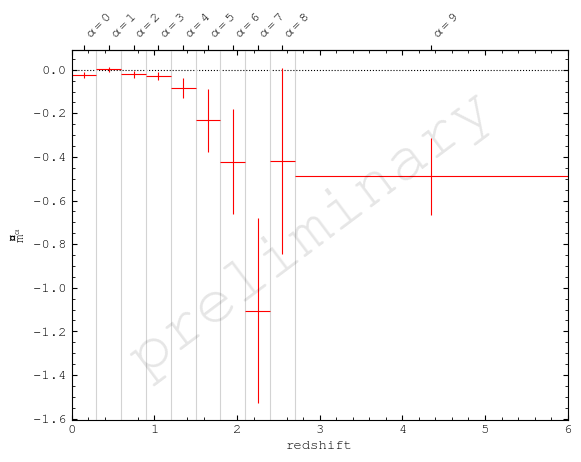

In [27]:
fig, axs = plt.subplots(1, 1)

axs.axhline(0, ls=":")

_zc = []
with h5py.File(input_file, "r") as N_gamma_alpha:
    for tomographic_bin in ALPHA_BINS:
        
        # tomo_results = results[np.nonzero(results["tomographic_bin"] == tomographic_bin)]
        # zlow = tomo_results["zlow"]
        # zhigh = tomo_results["zhigh"]
        # zcenter = 0.5 * (zlow + zhigh)
        # zdiff = zhigh - zlow
        alpha_sel = N_gamma_alpha["shear/mean_params"][:, 0] == tomographic_bin
        tomo_sel = N_gamma_alpha["shear/mean_params"][:, 1] == tomographic_bin
        sel = alpha_sel & tomo_sel
        alphas = N_gamma_alpha["shear/mean_params"][sel, 0]
        Ngammaalpha_mean = N_gamma_alpha["shear/mean"][sel]
        Ngammaalpha_var = np.diag(N_gamma_alpha["shear/cov"])[sel]
        zl = np.array([ALPHA[alpha][0] for alpha in alphas])
        zh = np.array([ALPHA[alpha][1] for alpha in alphas])
        # zl = Ngammaalpha["zlow"]
        # zh = Ngammaalpha["zhigh"]
        zc = 0.5 * (zl + zh)
        zd = zh - zl
        _zc.append(zc)

        for i, (_zl, _zh) in enumerate(zip(zl, zh)):
            # axs.axvline(_zh, ls=":")
            # axs.axvline(_zh, alpha=0.1)
            axs.axvline(_zh, c="lightgray")
            # axs.text(
            #     zh,
            #     0,
            #     f"$\\alpha = {i}$",
            #     ha="right",
            #     va="center",
            # )
    
        # N = tomo_results["dg_obs_mean"] / tomo_results["dg_true_mean"]
        # # N_error = 3 * tomo_results["dg_obs_std"] / tomo_results["dg_true_std"]
        # N_error = 3 * np.abs(N) * np.hypot(tomo_results["dg_obs_std"] / tomo_results["dg_obs_mean"], tomo_results["dg_true_std"] / tomo_results["dg_true_mean"])
    
        axs.errorbar(
            zc,
            Ngammaalpha_mean - 1,
            [
                Ngammaalpha_var**(1/2),
                Ngammaalpha_var**(1/2),
            ],
            [
                zc - zl,
                zh - zc,
            ],
            fmt="none",
            c="r",
        )
        # axs.plot(
        #     zc,
        #     Ngammaalpha_mean - delta_ij,
        #     # fmt="none",
        #     c=tomo_colors[tomographic_bin],
        #     label=f"$\\beta = {tomographic_bin}$",
        #     zorder=-tomographic_bin,
        # )

zc = np.concatenate(_zc)

secax = axs.secondary_xaxis("top")
secax.set_ticks(
    zc,
    labels=[f"$\\alpha = {i}$" for i, z in enumerate(zc)],
    minor=False,
    ha="left",
    rotation=45,
)
secax.set_ticks(
    [],
    minor=True,
)
secax.tick_params(
    direction="out",
)


axs.set_xlabel("redshift")
axs.set_ylabel("$\\hat{m}^{\\alpha}$")
axs.set_xlim(0, 6)

# axs.set_ylim(-0.1, 0.1)

lib.plotting.watermark(fig)


plt.show()

Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.
Font 'regular' does not have a glyph for '\\circumflexaccent' [U+302], substituting with a dummy symbol.


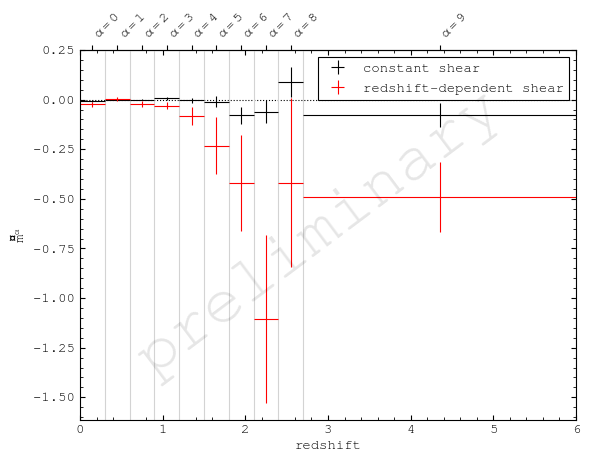

In [28]:
fig, axs = plt.subplots(1, 1)

axs.axhline(0, ls=":")

_zc = []
with (
    h5py.File(input_file, "r") as N_gamma_alpha,
    h5py.File(input_file_constant, "r") as N_gamma_alpha_constant,
):
    for tomographic_bin in ALPHA_BINS:
        
        # tomo_results = results[np.nonzero(results["tomographic_bin"] == tomographic_bin)]
        # zlow = tomo_results["zlow"]
        # zhigh = tomo_results["zhigh"]
        # zcenter = 0.5 * (zlow + zhigh)
        # zdiff = zhigh - zlow
        alpha_sel = N_gamma_alpha["shear/mean_params"][:, 0] == tomographic_bin
        tomo_sel = N_gamma_alpha["shear/mean_params"][:, 1] == tomographic_bin
        sel = alpha_sel & tomo_sel
        alphas = N_gamma_alpha["shear/mean_params"][sel, 0]
        Ngammaalpha_mean = N_gamma_alpha["shear/mean"][sel]
        Ngammaalpha_var = np.diag(N_gamma_alpha["shear/cov"])[sel]
        Ngammaalpha_constant_mean = N_gamma_alpha_constant["shear/mean"][sel]
        Ngammaalpha_constant_var = np.diag(N_gamma_alpha_constant["shear/cov"])[sel]
        zl = np.array([ALPHA[alpha][0] for alpha in alphas])
        zh = np.array([ALPHA[alpha][1] for alpha in alphas])
        # zl = Ngammaalpha["zlow"]
        # zh = Ngammaalpha["zhigh"]
        zc = 0.5 * (zl + zh)
        zd = zh - zl
        _zc.append(zc)

        for i, (_zl, _zh) in enumerate(zip(zl, zh)):
            # axs.axvline(_zh, ls=":")
            # axs.axvline(_zh, alpha=0.1)
            axs.axvline(_zh, c="lightgray")
            # axs.text(
            #     zh,
            #     0,
            #     f"$\\alpha = {i}$",
            #     ha="right",
            #     va="center",
            # )
    
        # N = tomo_results["dg_obs_mean"] / tomo_results["dg_true_mean"]
        # # N_error = 3 * tomo_results["dg_obs_std"] / tomo_results["dg_true_std"]
        # N_error = 3 * np.abs(N) * np.hypot(tomo_results["dg_obs_std"] / tomo_results["dg_obs_mean"], tomo_results["dg_true_std"] / tomo_results["dg_true_mean"])
        axs.errorbar(
            zc,
            Ngammaalpha_constant_mean - 1,
            [
                Ngammaalpha_constant_var**(1/2),
                Ngammaalpha_constant_var**(1/2),
            ],
            [
                zc - zl,
                zh - zc,
            ],
            fmt="none",
            c="k",
            label="constant shear" if tomographic_bin == 0 else None,
        )    
        axs.errorbar(
            zc,
            Ngammaalpha_mean - 1,
            [
                Ngammaalpha_var**(1/2),
                Ngammaalpha_var**(1/2),
            ],
            [
                zc - zl,
                zh - zc,
            ],
            fmt="none",
            c="r",
            label="redshift-dependent shear" if tomographic_bin == 0 else None,
        )
        # axs.plot(
        #     zc,
        #     Ngammaalpha_mean - delta_ij,
        #     # fmt="none",
        #     c=tomo_colors[tomographic_bin],
        #     label=f"$\\beta = {tomographic_bin}$",
        #     zorder=-tomographic_bin,
        # )

zc = np.concatenate(_zc)

secax = axs.secondary_xaxis("top")
secax.set_ticks(
    zc,
    labels=[f"$\\alpha = {i}$" for i, z in enumerate(zc)],
    minor=False,
    ha="left",
    rotation=45,
)
secax.set_ticks(
    [],
    minor=True,
)
secax.tick_params(
    direction="out",
)


axs.set_xlabel("redshift")
axs.set_ylabel("$\\hat{m}^{\\alpha}$")
axs.set_xlim(0, 6)
axs.legend(loc="upper right")

# axs.set_ylim(-0.1, 0.1)

lib.plotting.watermark(fig)


plt.show()